In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from
pd.set_option('display.max_columns', None)

In [8]:
features = pd.read_csv('training_set_features.csv')
features.head(5)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               NaN                   NaN   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               NaN                          3.0                1.0   
3               NaN                          3.0                3.0   
4               NaN                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own         

In [9]:
features.tail()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
26702                    0.0               0.0                   0.0   
26703                    0.0               1.0                   1.0   
26704                    1.0               0.0                   0.0   
26705                    NaN               0.0                   0.0   
26706                    0.0               0.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
26702                    0.0                   0.0            0.0   
26703                    0.0                   0.0            1.0   
26704                    0.0                   0.0            0.0   
26705                    0.0                   0.0            0.0   
26706                    0.0                   0.0            0.0   

       health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
26702               NaN                          3.0                1.0   
26703               1.0                          4.0                2.0   
26704               NaN                          4.0                4.0   
26705               0.0                          3.0                1.0   
26706               1.0                          5.0                1.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
26702                          1.0                          5.0   
26703                          2.0                          5.0   
26704                          2.0                          5.0   
26705                          2.0                          2.0   
26706                          1.0                          5.0   

       opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
26702                2.0                          2.0      65+ Years   
26703                1.0                          1.0  18 - 34 Years   
26704                4.0                          2.0  55 - 64 Years   
26705                1.0                          2.0  18 - 34 Years   
26706                1.0                          1.0      65+ Years   

              education      race     sex             income_poverty  \
26702      Some College     White  Female  <= $75,000, Above Poverty   
26703  College Graduate     White    Male  <= $75,000, Above Poverty   
26704      Some College     White  Female                        NaN   
26705      Some College  Hispanic  Female  <= $75,000, Above Poverty   
26706      Some College     White    Male  <= $75,000, Above Poverty   

      marital_status rent_or_own   employment_status hhs_geo_region  \
26702    Not Married         Own  Not in Labo

In [54]:
labels = pd.read_csv('training_set_labels.csv')
labels

respondent_id  h1n1_vaccine  seasonal_vaccine
0                  0             0                 0
1                  1             0                 1
2                  2             0                 0
3                  3             0                 1
4                  4             0                 0
...              ...           ...               ...
26702          26702             0                 0
26703          26703             0                 0
26704          26704             0                 1
26705          26705             0                 0
26706          26706             0                 0

[26707 rows x 3 columns]

In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [13]:
# 0 - female, 1 - male
features['sex'] = features['sex'].astype('category')
features['sex'] = features['sex'].cat.codes
features['sex'].value_counts()

0    15858
1    10849
Name: sex, dtype: int64

In [38]:
for column in features.columns:
    if features[column].dtype == 'float64':
        features[column] = features[column].astype('category')
        features[column] = features[column].cat.codes

In [31]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

<AxesSubplot:>

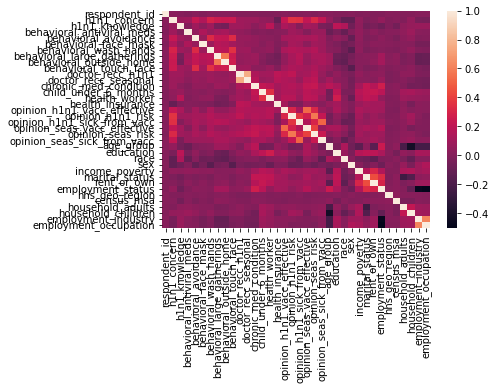

In [40]:
corr = features.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [39]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   respondent_id                26707 non-null  int64
 1   h1n1_concern                 26707 non-null  int8 
 2   h1n1_knowledge               26707 non-null  int8 
 3   behavioral_antiviral_meds    26707 non-null  int8 
 4   behavioral_avoidance         26707 non-null  int8 
 5   behavioral_face_mask         26707 non-null  int8 
 6   behavioral_wash_hands        26707 non-null  int8 
 7   behavioral_large_gatherings  26707 non-null  int8 
 8   behavioral_outside_home      26707 non-null  int8 
 9   behavioral_touch_face        26707 non-null  int8 
 10  doctor_recc_h1n1             26707 non-null  int8 
 11  doctor_recc_seasonal         26707 non-null  int8 
 12  chronic_med_condition        26707 non-null  int8 
 13  child_under_6_months         26707 non-null  i

In [47]:
X = features.drop('respondent_id', axis=1)
Y = labels[['h1n1_vaccine', 'seasonal_vaccine']]
clf = MultiOutputClassifier(LogisticRegression()).fit(X, Y)

/home/ignat/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ignat/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [57]:
test = pd.read_csv('test_set_features.csv')
test

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              26707           2.0             2.0                        0.0   
1              26708           1.0             1.0                        0.0   
2              26709           2.0             2.0                        0.0   
3              26710           1.0             1.0                        0.0   
4              26711           3.0             1.0                        1.0   
...              ...           ...             ...                        ...   
26703          53410           1.0             1.0                        0.0   
26704          53411           3.0             1.0                        0.0   
26705          53412           0.0             1.0                        0.0   
26706          53413           3.0             1.0                        0.0   
26707          53414           2.0             1.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       1.0                   0.0                    1.0   
1                       0.0                   0.0                    0.0   
2                       0.0                   1.0                    1.0   
3                       0.0                   0.0                    0.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   0.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    1.0   
26707                   0.0                   0.0                    1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              1.0                      0.0   
1                              0.0                      0.0   
2                              1.0                      1.0   
3                              0.0                      0.0   
4                              1.0                      1.0   
...                            ...                      ...   
26703                          0.0                      0.0   
26704                          1.0                      1.0   
26705                          0.0                      0.0   
26706                          0.0                      1.0   
26707                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                        1.0               0.0                   0.0   
1                        0.0               0.0                   0.0   
2                        1.0               0.0                   0.0   
3                        0.0               1.0                   1.0   
4                        1.0               0.0                   0.0   
...                      ...               ...                   ...   
26703                    1.0               1.0                   1.0   
26704                    1.0               0.0                   0.0   
26705                    0.0               0.0                   0.0   
26706                    0.0               0.0                   0.0   
26707                    1.0               1.0                   0.0   

       chronic_med_condition  child_under_6_months  health_worker  \
0                        0.0                   0.0            0.0   
1                        0.0                   0.0            0.0   
2                        0.0                   0.0            0.0   
3                        1.0                   0.0            0.0   
4                        0.0                   0.0            1.0   
...                      ...                   ...            ...   
26703           

In [58]:
for column in test.columns[1:]:
        test[column] = test[column].astype('category')
        test[column] = test[column].cat.codes

In [59]:
X_pred = test.drop('respondent_id', axis=1)

In [60]:
Y_pred = clf.predict(X_pred)

In [61]:
result = pd.DataFrame(Y_pred, columns=['h1n1_vaccine', 'seasonal_vaccine'])
result.set_index(test['respondent_id'], inplace=True)
result

h1n1_vaccine  seasonal_vaccine
respondent_id                                
26707                     0                 0
26708                     0                 0
26709                     0                 1
26710                     1                 1
26711                     0                 1
...                     ...               ...
53410                     0                 1
53411                     0                 0
53412                     0                 0
53413                     0                 0
53414                     1                 1

[26708 rows x 2 columns]

In [65]:
for column in result.columns:
        result[column] = result[column].astype('float64')
result.to_csv('Submission.csv')

In [68]:
result.to_csv('Submission.csv')